In [160]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the Data of diffrent type of Drug based on patient disease

In [214]:
df = pd.read_csv('drug200.csv')

# Explore the data

In [215]:
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          200 non-null    int64
 1   Sex          200 non-null    int32
 2   BP           200 non-null    int32
 3   Cholesterol  200 non-null    int32
 4   Na_to_K      200 non-null    int64
 5   Drug         200 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 6.4 KB


In [67]:
df.describe()

Age         Sex          BP  Cholesterol     Na_to_K        Drug
count  200.000000  200.000000  200.000000   200.000000  200.000000  200.000000
mean    27.950000    0.520000    0.910000     0.485000   98.560000    2.870000
std     15.762289    0.500854    0.821752     0.501029   57.092945    1.372047
min      0.000000    0.000000    0.000000     0.000000    0.000000    0.000000
25%     15.000000    0.000000    0.000000     0.000000   49.750000    2.000000
50%     28.000000    1.000000    1.000000     0.000000   98.500000    3.000000
75%     41.000000    1.000000    2.000000     1.000000  147.250000    4.000000
max     56.000000    1.000000    2.000000     1.000000  197.000000    4.000000

# Explore the behavior of the data by using some graphs

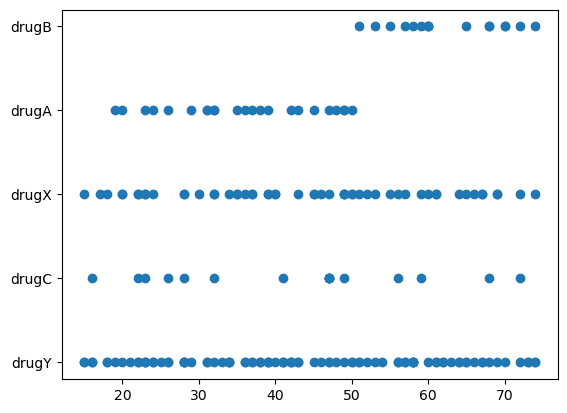

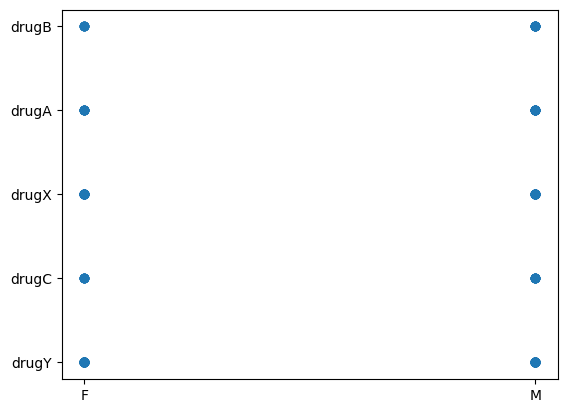

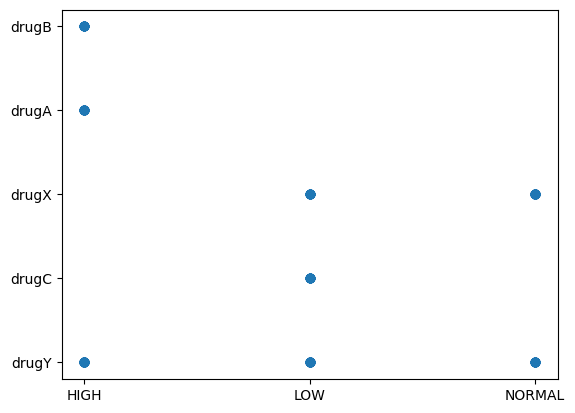

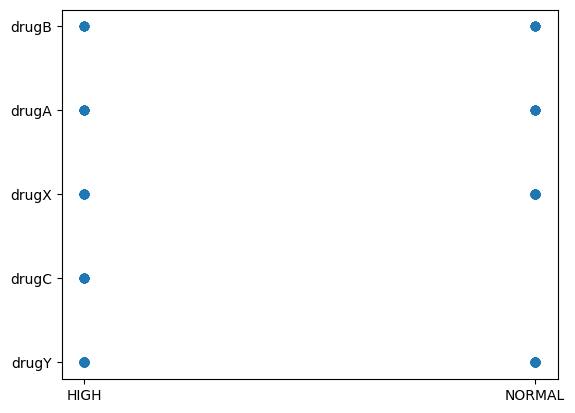

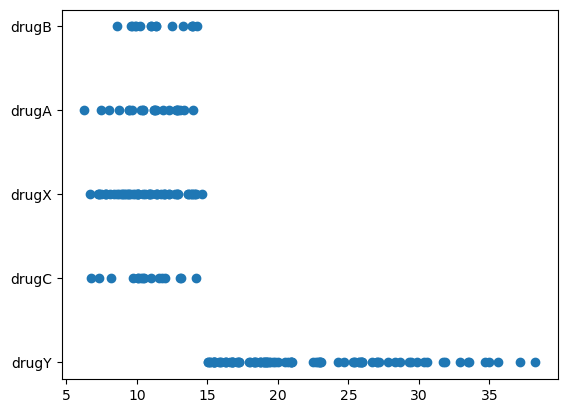

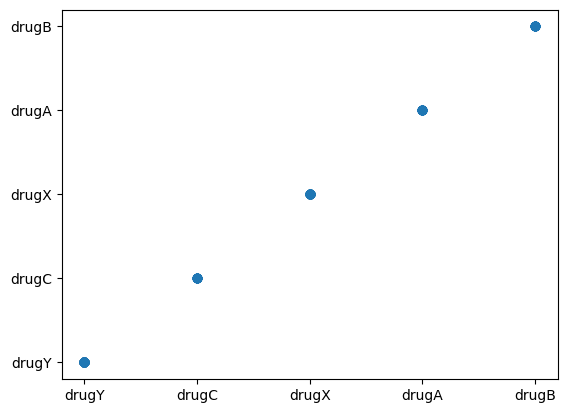

In [174]:
for scate in df.columns:
    plt.scatter(x = df[scate], y = df['Drug'])
    plt.show()

<Axes: ylabel='count'>

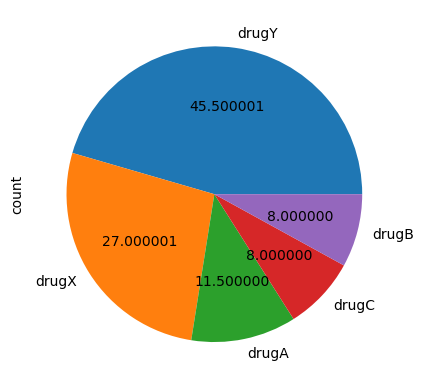

In [175]:
df['Drug'].value_counts().plot(kind='pie',autopct='%2f')

Convert All string values in numeric values for better prediction 

In [207]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if i=='Na_to_K':
        continue
    elif i=='Age':
        continue
    else:  
        a = LabelEncoder()
        new_col = a.fit_transform(df[i])
        df[i] = new_col

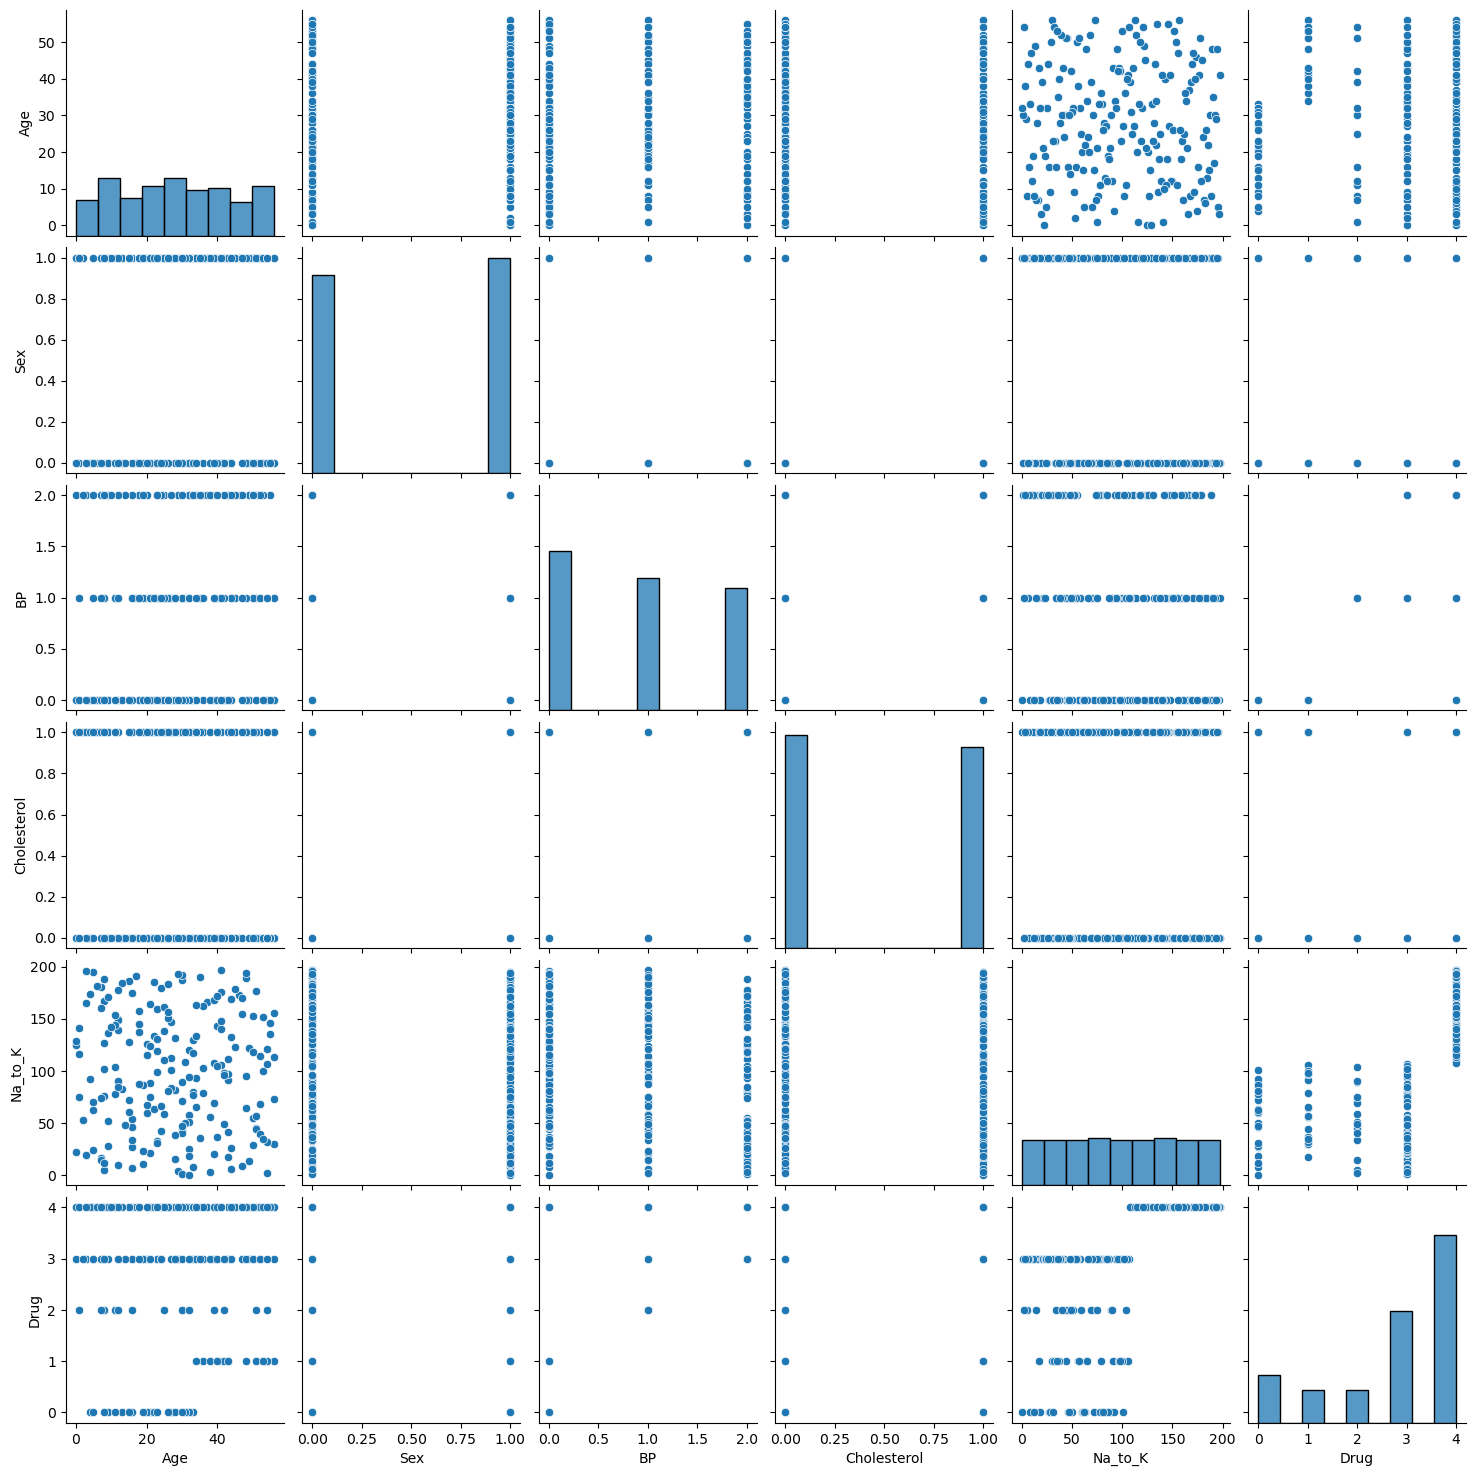

In [178]:
sns.pairplot(df)

# Learn our model with loaded dataset drug200 

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier()

In [77]:
x = df[['Age','BP','Cholesterol','Sex','Na_to_K']]
y = df['Drug']
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y)

In [80]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [179]:
model.predict(Xtest)

array([4, 4, 3, 0, 0, 4, 0, 4, 2, 4, 0, 3, 4, 4, 0, 0, 4, 4, 0, 4, 3, 0,
       3, 0, 4, 4, 3, 4, 1, 3, 3, 0, 0, 1, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3,
       1, 3, 4, 2, 0, 0])

# Convert Drug numeric value into string value for getting output in drug name

In [219]:
col1 = int(input('Enter First Value'))
col2 = int(input('Enter second Value'))
col3 = int(input('Enter third Value'))
col4 = int(input('Enter fourth Value'))
col5 = int(input('Enter fifth Value'))
d = pd.DataFrame([{'Age':col1,'BP':col2,'Cholesterol':col3,'Sex':col4,'Na_to_K':col5}])

for predict in model.predict(d):
    if predict==4:
        predict='DrugY'
    elif predict == 3:
        predict='DrugX'
    elif predict == 2:
        predict='DrugC'
    elif predict == 1:
        predict='DrugB'
    else:
        predict='DrugA'
    print('Your Prefered Drug is:  ',predict)

Enter First Value 8
Enter second Value 0
Enter third Value 0
Enter fourth Value 0
Enter fifth Value 167


Your Prefered Drug is:   DrugY


# Check our model score which is good or bad

In [226]:
model.score(Xtrain,ytrain)

1.0